In [105]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None) 

In [96]:
df = pd.read_csv("Test-Analyst.csv")
df.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275.000.000,0,0,275.000.000,0,275.000.000,1
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238.000.000,0,0,238.000.000,0,238.000.000,1
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535.000.000,0,0,535.000.000,0,535.000.000,1
3,Sheila Dress Clove,Kab. Bogor,Social,1,475.000.000,0,0,475.000.000,0,475.000.000,1
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545.000.000,0,0,545.000.000,0,545.000.000,1


In [97]:
#checking the shape of dataset
df.shape

(219, 11)

In [98]:
#Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_title    219 non-null    object
 1   shipping_city    219 non-null    object
 2   referrer_source  219 non-null    object
 3   orders           219 non-null    int64 
 4   gross_sales      219 non-null    object
 5   discounts        219 non-null    object
 6   returns          219 non-null    object
 7   net_sales        219 non-null    object
 8   shipping         219 non-null    int64 
 9   total_sales      219 non-null    object
 10  net_quantity     219 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 18.9+ KB


In [100]:
#Checking if there are any null values present in the dataset or not ?
df.isnull().sum()

product_title      0
shipping_city      0
referrer_source    0
orders             0
gross_sales        0
discounts          0
returns            0
net_sales          0
shipping           0
total_sales        0
net_quantity       0
dtype: int64

In [101]:
#Checking if there are any duplicate values present in the dataset or not ?
df.duplicated().sum()

0

In [102]:
#change data type object to numeric
df['gross_sales'] = df['gross_sales'].apply(lambda x: int(x.split()[0].replace('.', ''))/1000)
df['discounts'] = df['discounts'].apply(lambda x: int(x.split()[0].replace('.', ''))/1000)
df['returns'] = df['returns'].apply(lambda x: int(x.split()[0].replace('.', ''))/1000)
df['net_sales'] = df['net_sales'].apply(lambda x: int(x.split()[0].replace('.', ''))/1000)
df['total_sales'] = df['total_sales'].apply(lambda x: int(x.split()[0].replace('.', ''))/1000)

In [103]:
df.sample(5)

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
192,Mia Blouse (Minor) Candy,Jakarta Selatan,Social,1,330000.0,0.0,0.0,330000.0,0,330000.0,1
103,Vienna Scarf Pistachio,Bekasi,Search,1,115000.0,0.0,0.0,115000.0,0,115000.0,1
128,Shea Blouse Irish Fog,Boyolali,Search,1,535000.0,0.0,0.0,535000.0,0,535000.0,1
118,Claire Blouse Burnt Cinnamon,Kabupaten Sukabumi,Social,1,238000.0,0.0,0.0,238000.0,0,238000.0,1
96,Ruby Shirt Ocean Mist,Kota Bandung,Social,0,0.0,0.0,-495000.0,-495000.0,0,-495000.0,-1


In [106]:
df['shipping_city'].value_counts()

shipping_city
Kota Palembang                       9
Tangerang Selatan                    9
Kota Tangerang                       8
Kota Bekasi                          8
Kota Adm. Jakarta Selatan            7
Jakarta Selatan                      7
Bekasi                               7
Gresik                               6
Kab. Bogor                           6
Kab. Bekasi                          5
Kota Padang                          5
Kota Tangerang Selatan               5
Kota Bandung                         5
Kota Depok                           5
Kab. Jember                          5
Jakarta Barat                        4
Kab. Karawang                        4
Tangerang                            4
Kota Surabaya                        4
Pangkalpinang                        3
Kota Cirebon                         3
Boyolali                             3
Kota Adm. Jakarta Timur              3
Kota Adm. Jakarta Barat              3
Jember                               2
Prabumulih 

In [107]:
replace_dict = {
    'Ketapant': 'Kab. Ketapang',
    'Jakarta Timur': 'Kota Adm. Jakarta Timur',
    'Kota Administrasi Jakarta Selatan': 'Kota Adm. Jakarta Selatan',
    'Surabaya': 'Kota Surabaya',
    'Jakarta Selatan': 'Kota Adm. Jakarta Selatan',
    'Cirebon': 'Kabupaten Cirebon',
    'Kota Cirebon': 'Kabupaten Cirebon'
}

# Replacing city with right city
df['shipping_city'] = df['shipping_city'].replace(replace_dict)

In [108]:
df['referrer_source'].unique()

array(['Social', 'Search', 'Direct', 'Unknown'], dtype=object)

In [109]:
df['shipping_city'].value_counts()

shipping_city
Kota Adm. Jakarta Selatan    15
Kota Palembang                9
Tangerang Selatan             9
Kota Tangerang                8
Kota Bekasi                   8
Bekasi                        7
Gresik                        6
Kab. Bogor                    6
Kabupaten Cirebon             5
Kota Depok                    5
Kab. Jember                   5
Kota Surabaya                 5
Kota Tangerang Selatan        5
Kota Bandung                  5
Kab. Bekasi                   5
Kota Padang                   5
Kota Adm. Jakarta Timur       5
Jakarta Barat                 4
Kab. Karawang                 4
Tangerang                     4
Kota Adm. Jakarta Barat       3
Pangkalpinang                 3
Boyolali                      3
Kab. Sleman                   2
Kota Medan                    2
Jember                        2
Kabupaten Rejang Lebong       2
Jombang                       2
Kab. Kampar                   2
Kab. Solok Selatan            2
Kab. Pekalongan           

In [110]:
df.describe()

,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
count,219.000000,2.190000e+02,219.000000,219.000000,2.190000e+02,219.0,2.190000e+02,219.000000
mean,1.000000,4.272740e+05,-1141.552511,-2260.273973,4.238721e+05,0.0,4.238721e+05,1.123288
std,0.095783,2.499247e+05,8383.213459,33449.000231,2.552023e+05,0.0,2.552023e+05,0.619526
min,0.000000,0.000000e+00,-100000.000000,-495000.000000,-4.950000e+05,0.0,-4.950000e+05,-1.000000
25%,1.000000,2.950000e+05,0.000000,0.000000,2.950000e+05,0.0,2.950000e+05,1.000000
50%,1.000000,3.500000e+05,0.000000,0.000000,3.500000e+05,0.0,3.500000e+05,1.000000
75%,1.000000,4.750000e+05,0.000000,0.000000,4.750000e+05,0.0,4.750000e+05,1.000000
max,2.000000,2.260000e+06,0.000000,0.000000,2.240000e+06,0.0,2.240000e+06,7.000000


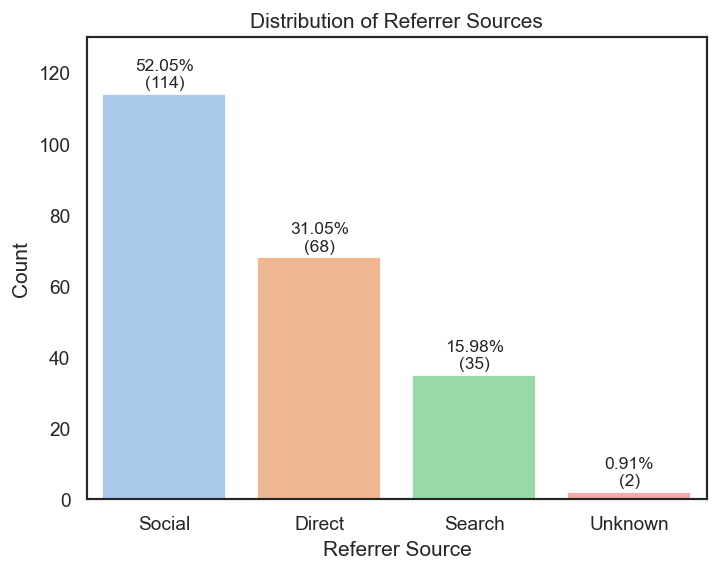

In [186]:
#Distribution of Referrer Source
plt.figure(dpi=125)
sns.set_palette("pastel")
sns.set_style("white")

# Plot the pie chart
referrer_counts = df['referrer_source'].value_counts()
ax = sns.countplot(x='referrer_source', data=df, order=referrer_counts.index)
plt.title('Distribution of Referrer Sources')

# Adding the percentage labels
total = len(df)
for i, count in enumerate(referrer_counts):
    percentage = (count / total) * 100
    ax.text(i, count + 1, f'{percentage:.2f}%\n({count})', ha='center', va='bottom', fontsize=10)

# Set labels
ax.set(xlabel='Referrer Source', ylabel='Count')
ax.set_ylim(0, 130)
plt.savefig('Distribution of Referrer Sources.png')
plt.show()

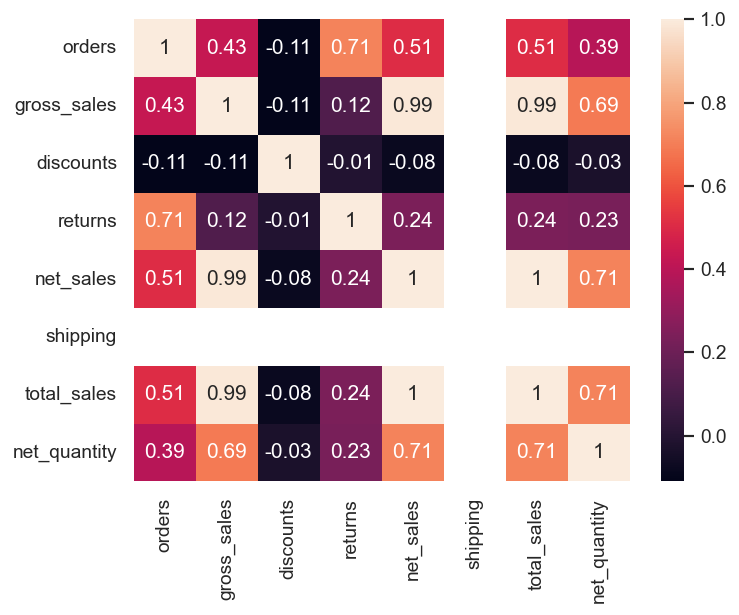

In [187]:
plt.figure(dpi=125)
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(np.round(numerical_df.corr(),2),annot=True)
plt.savefig('Heatmap.png')
plt.show()

In [194]:
numerical_df.corr()

,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
orders,1.000000,0.433068,-0.114255,0.708727,0.513251,NaN,0.513251,0.386516
gross_sales,0.433068,1.000000,-0.109407,0.116055,0.990937,NaN,0.990937,0.690869
discounts,-0.114255,-0.109407,1.000000,-0.009244,-0.075507,NaN,-0.075507,-0.025771
returns,0.708727,0.116055,-0.009244,1.000000,0.244420,NaN,0.244420,0.232656
net_sales,0.513251,0.990937,-0.075507,0.244420,1.000000,NaN,1.000000,0.706229
shipping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sales,0.513251,0.990937,-0.075507,0.244420,1.000000,NaN,1.000000,0.706229
net_quantity,0.386516,0.690869,-0.025771,0.232656,0.706229,NaN,0.706229,1.000000


In [134]:
df['product_title'].value_counts()

product_title
Claire Blouse Crystal Ruby               8
Amaya Blouse Hazelwood                   5
Ruby Scarf Ocean Mist                    5
Selena Dress Misty Grey                  4
Talia Dress Woodrose                     4
Alice Brooch                             4
Sara Outer (Minor) Misty Grey            3
Selena Dress Hazel                       3
Gina Blouse (Minor) Charcoal             3
Adrianna Blouse Cloud Grey               3
Yara Shirt Blush                         3
Claire Blouse Hazel                      3
Ruby Scarf Pearl                         3
Sheila Dress Clove                       3
Claire Blouse Burnt Cinnamon             3
Kiara Dress Almond                       3
Thalia Dress Desert                      2
Camilla Tunic Shoreline                  2
Kiara Dress Cotton Candy                 2
Edith Blouse Red Pear                    2
Cessy Dress Candlenut                    2
Chloe Tunic Treasure                     2
Ruby Scarf Charcoal                     

<Figure size 800x600 with 0 Axes>

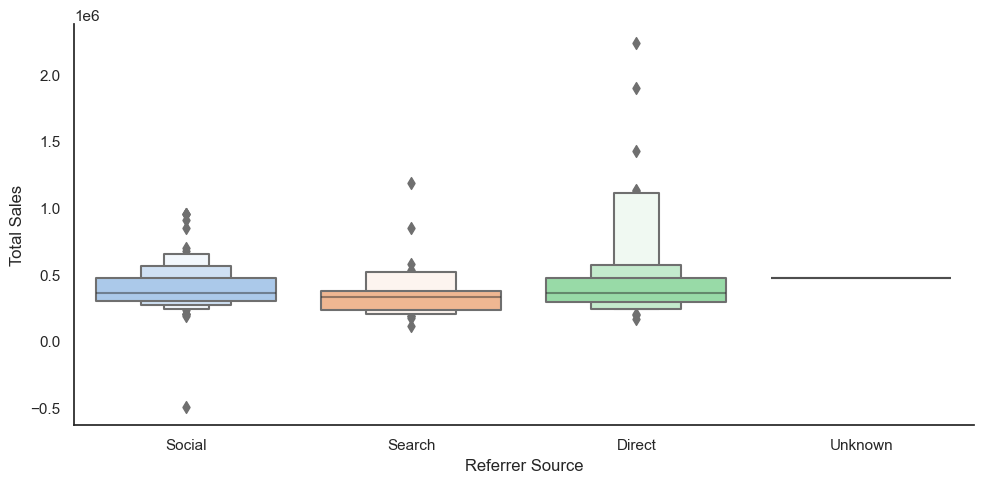

In [188]:
#Boxplot of Referrer Source
plt.figure(dpi=125)
sns.catplot(y ='total_sales',x='referrer_source', data = df,kind='boxen',aspect=2) 
plt.xlabel('Referrer Source')
plt.ylabel('Total Sales')
plt.savefig('Boxplot of Referrer Sources.png')
plt.show()

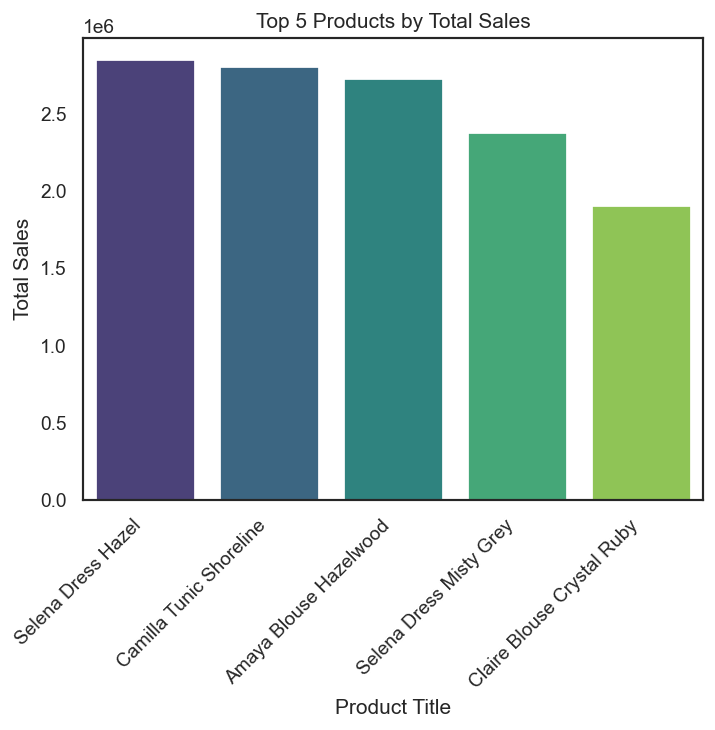

In [189]:
# Group by product title and calculate total sales
total_sales_by_product = df.groupby('product_title')['total_sales'].sum().reset_index()

# Get the top 5 product titles by total sales
top_5_products = total_sales_by_product.nlargest(5, 'total_sales')

# Plotting
plt.figure(dpi=125)
sns.barplot(x=top_5_products['product_title'], y=top_5_products['total_sales'], data=df, palette="viridis")
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product Title')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.savefig('Top 5 Products by Total Sales.png')
plt.show()

In [176]:
total_sales_by_product

,product_title,total_sales
0,Adelyn Tunic Gravel,385000.00
1,Adrianna Blouse Cloud Grey,735000.00
2,Alice Blouse Caramel Latte,200000.00
3,Alice Brooch,1750000.00
4,Alice Pashmina Plain Mauve,170000.00
5,Alina Dress Soft Peach,700000.00
6,Amanda Dress Almond Latte,950000.00
7,Amanda Dress Woodcreme,475000.00
8,Amaya Blouse Hazelwood,2725000.00
9,Amaya Blouse Sienna,545000.00


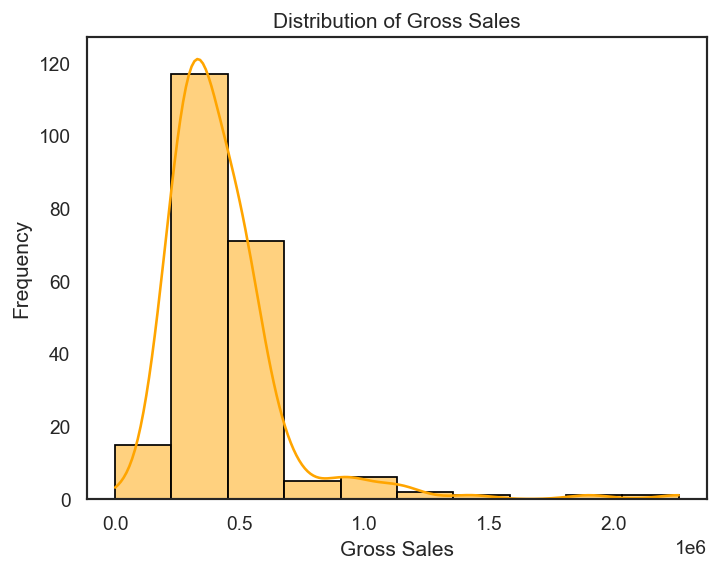

In [190]:
#Distribution of the gross sales
plt.figure(dpi=125)
sns.histplot(df['gross_sales'], bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Gross Sales')
plt.xlabel('Gross Sales')
plt.ylabel('Frequency')
plt.savefig('Distribution of Gross Sales.png')
plt.show()

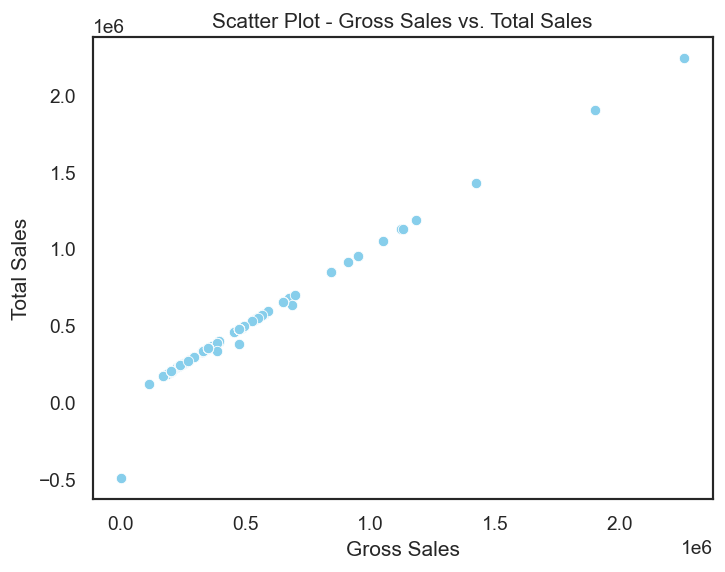

In [191]:
# Plotting the scatter plot
plt.figure(dpi=125)
sns.scatterplot(x='gross_sales', y='total_sales', data=df, color='skyblue')
plt.title('Scatter Plot - Gross Sales vs. Total Sales')
plt.xlabel('Gross Sales')
plt.ylabel('Total Sales')
plt.savefig('Scatter Plot.png')
plt.show()

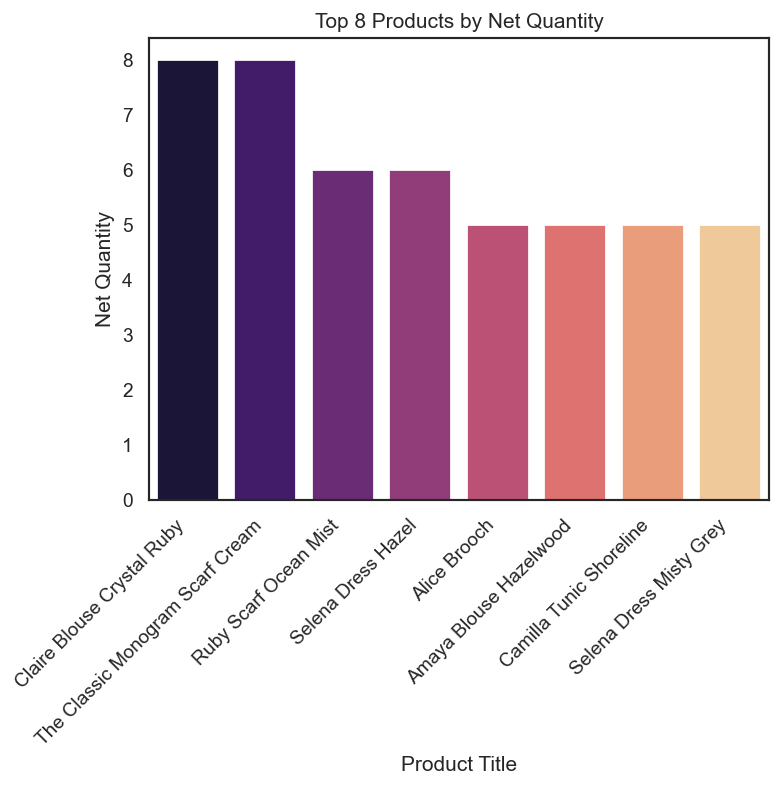

In [192]:
# Group by product title and calculate total net quantity
total_quantity_by_product = df.groupby('product_title')['net_quantity'].sum().reset_index()

# Get the top 8 product titles by net quantity
top_8_products_quantity = total_quantity_by_product.nlargest(8, 'net_quantity')

# Plotting
plt.figure(dpi=125)
sns.barplot(x=top_8_products_quantity['product_title'], y=top_8_products_quantity['net_quantity'], data=df, palette="magma")
plt.title('Top 8 Products by Net Quantity')
plt.xlabel('Product Title')
plt.ylabel('Net Quantity')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.savefig('Top 8 Products by Net Quantity.png')
plt.show()

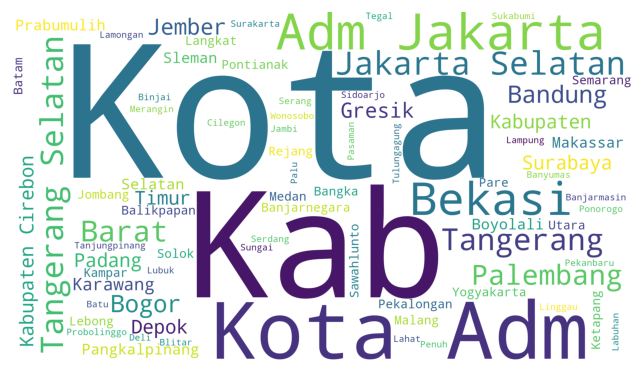

In [193]:
#wordcloud
from wordcloud import WordCloud
plt.figure(dpi=125)
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['shipping_city']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Wordcloud.png')
plt.show()